### **Khai báo thư viện**

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

### **Đọc dữ liệu**

In [135]:
df = pd.read_csv('Heart_2022_processed.csv')

In [136]:
df.head()

,HadHeartAttack,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadStroke,HadAsthma,HadSkinCancer,HadKidneyDisease,HadDiabetes,DifficultyWalking,SmokerStatus,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers
0,0,0,5,0,0,0,8,0,0,0,0,2,0,3,4,12,28.53,0
1,0,0,0,0,0,0,5,0,0,1,0,0,0,3,4,12,26.57,0
2,0,0,5,2,3,1,4,0,0,1,0,0,0,3,4,7,25.61,0
3,0,0,0,0,0,1,6,0,1,0,0,0,0,1,4,9,23.30,0
4,0,0,1,2,0,1,9,0,0,0,0,0,0,3,4,4,21.77,1


### **Hiểu dữ liệu**

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HadHeartAttack         445132 non-null  int64  
 1   Sex                    445132 non-null  int64  
 2   GeneralHealth          445132 non-null  int64  
 3   PhysicalHealthDays     445132 non-null  int64  
 4   MentalHealthDays       445132 non-null  int64  
 5   PhysicalActivities     445132 non-null  int64  
 6   SleepHours             445132 non-null  int64  
 7   HadStroke              445132 non-null  int64  
 8   HadAsthma              445132 non-null  int64  
 9   HadSkinCancer          445132 non-null  int64  
 10  HadKidneyDisease       445132 non-null  int64  
 11  HadDiabetes            445132 non-null  int64  
 12  DifficultyWalking      445132 non-null  int64  
 13  SmokerStatus           445132 non-null  int64  
 14  RaceEthnicityCategory  445132 non-nu

### **Tạo df_1 là danh sách những người bị bệnh tim**

In [141]:
df_1 = df[df['HadHeartAttack']==1]

### **Lựa chọn thuộc tính phân cụm**

C:\Users\QuangHa\AppData\Local\Temp\ipykernel_14308\1792983046.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[x], bins=15) #Điều chỉnh khoảng cách theo chiều dọc (hspace) và chiều ngang (wspace) giữa các đồ thị con trong hình vẽ lớn
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\QuangHa\AppData\Local\Temp\ipykernel_14308\1792983046.py:8: UserWarning: 

`distplot` is a deprecated function and will be remo

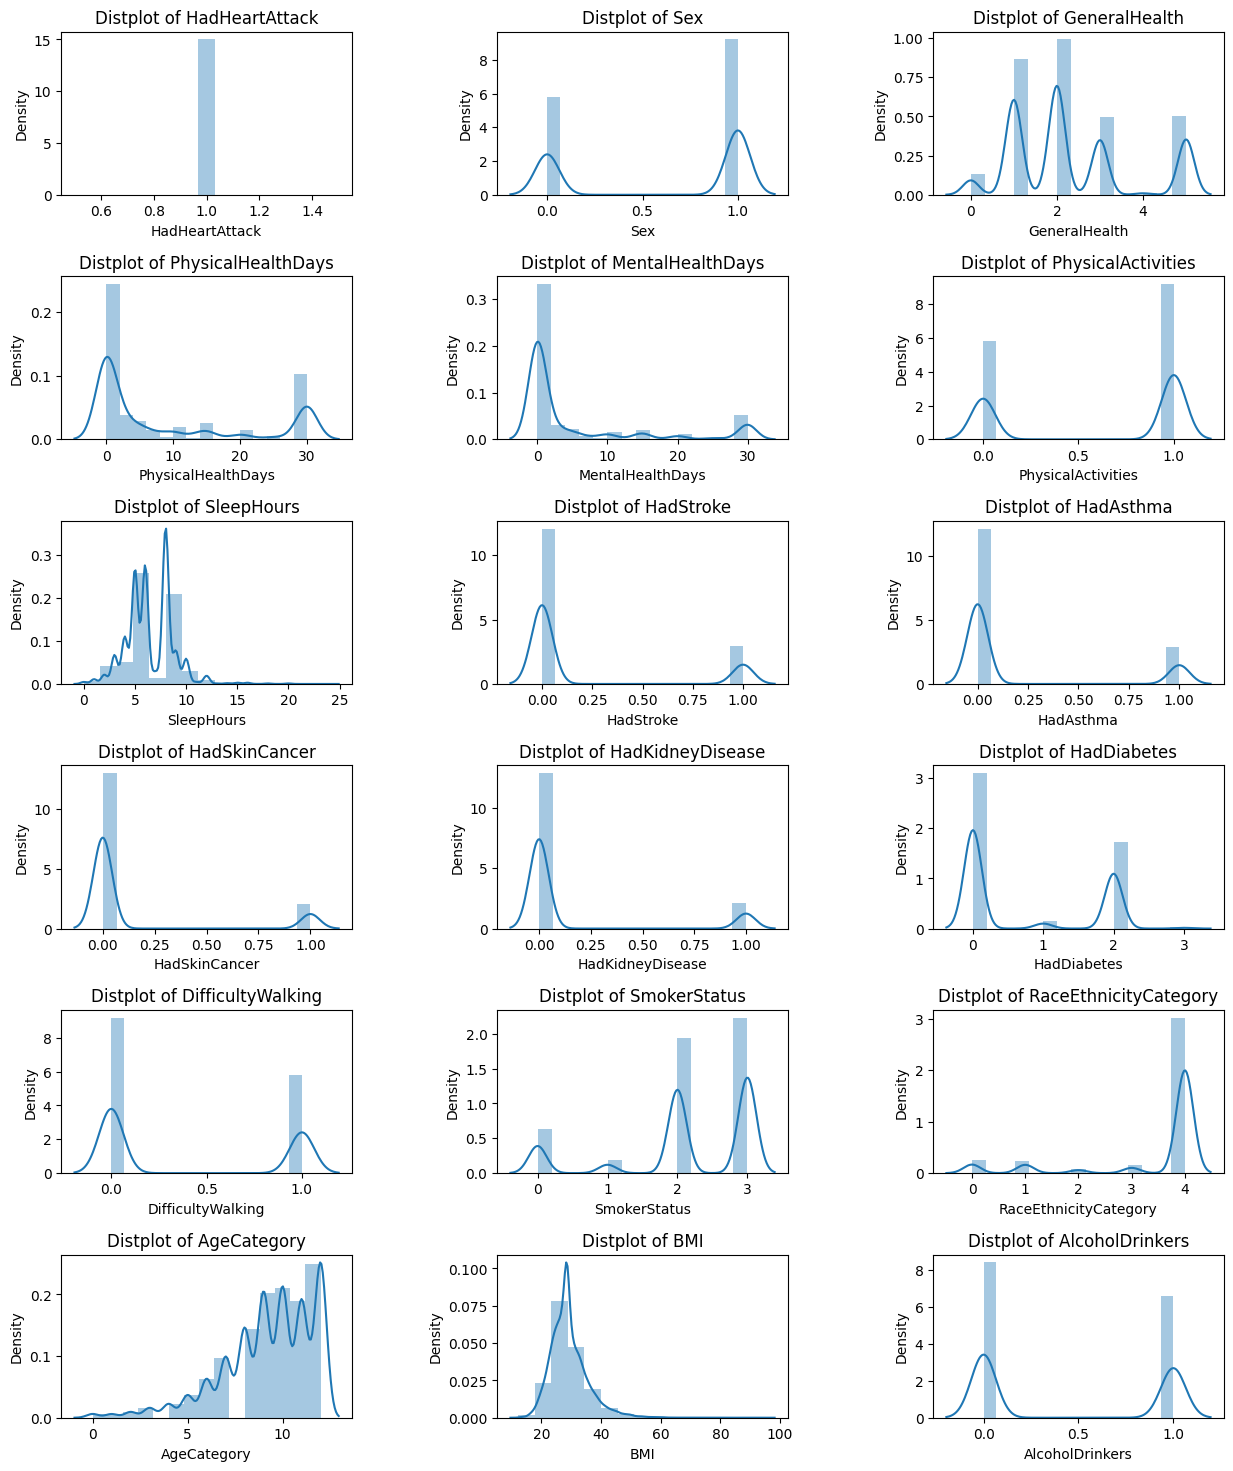

In [163]:
plt.figure(1, figsize=(15, 18)) #Tạo một hình vẽ mới với số thứ tự 1 và kích thước (chiều rộng, chiều cao) là (15, 18)
n = 0 #Khởi tạo biến đếm n với giá trị ban đầu là 0
for x in df.columns:
    n += 1
    plt.subplot(6, 3, n) #Tăng giá trị của biến đếm n lên 1 sau mỗi lần lặp
    plt.subplots_adjust(hspace=0.5, wspace=0.5) #Tạo một ô đồ thị con trên hình vẽ lớn có kích thước 6 hàng, 
    # 3 cột và đặt vị trí của đồ thị con bằng giá trị hiện tại của biến đếm n
    sns.distplot(df_1[x], bins=15) #Điều chỉnh khoảng cách theo chiều dọc (hspace) và chiều ngang (wspace) giữa các đồ thị con trong hình vẽ lớn
    plt.title('Distplot of {}'.format(x)) #Đặt tiêu đề cho đồ thị con với nội dung là "Distplot of" kèm theo tên của cột x
plt.show() #Vẽ biểu đồ

### **Phân cụm theo PhysicalHealthDays và BMI**

In [143]:
df_cluster1 = df_1[['PhysicalHealthDays', 'BMI']]

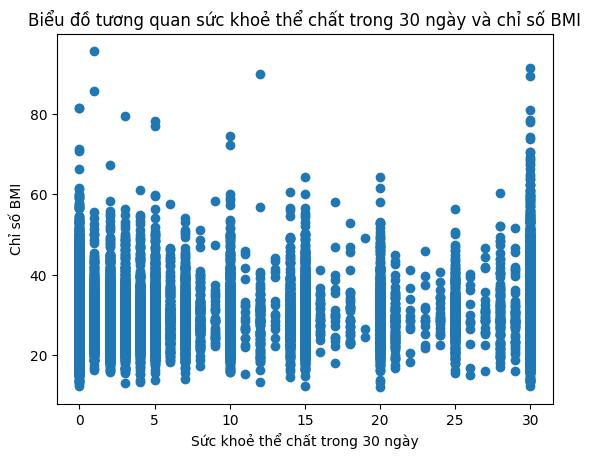

In [144]:
plt.scatter(df_cluster1['PhysicalHealthDays'], df_cluster1['BMI']) #Biểu đồ tương quan giữa hai giá trị
plt.xlabel('Sức khoẻ thể chất trong 30 ngày') #Tiêu đề trục hoành
plt.ylabel('Chỉ số BMI') #Tiêu đề trục tung
plt.title('Biểu đồ tương quan sức khoẻ thể chất trong 30 ngày và chỉ số BMI') #Tiêu đề biểu đồ
plt.show()

In [145]:
X1 = df_cluster1.values[:, 0:df_cluster1.shape[1]]
X1.shape

(25108, 2)

C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

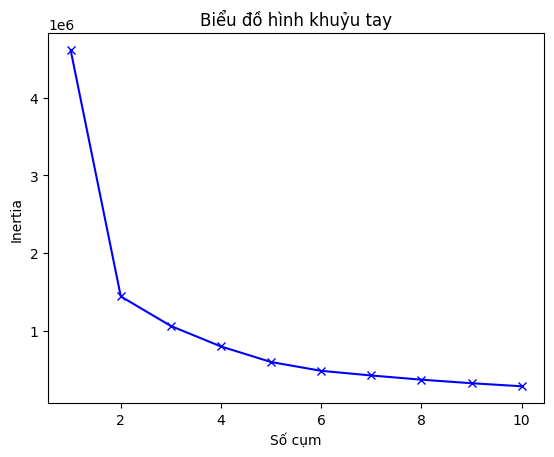

In [146]:
inertia = [] #Khởi tạo danh sách inertia để lưu trữ giá trị cho biết mức độ biến động của các điểm dữ liệu trong cùng một cụm.
k_range = range(1, 11) #Tạo dải giá trị từ 1 đến 10
for k in k_range: #tạo vòng lặp từ 1 đến 10 cho giá trị k
    kmeans = KMeans(n_clusters=k, random_state=42) #Tạo KMeans với số cụm là k và khởi tạo ngẫu nhiên của centroid được bằng random_state=42
    kmeans.fit(df_cluster1) #Huấn luyện mô hình KMeans trên dữ liệu df_cluster1 để tìm centroid và phân loại các điểm vào cụm tương ứng
    inertia.append(kmeans.inertia_) #Thêm giá trị inertia của mô hình KMeans hiện tại vào danh sách inertia

# Vẽ đồ thị Elbow
plt.plot(k_range, inertia, 'bx-') #Vẽ đồ thị đường với các điểm được đánh dấu bằng ký hiệu dấu x.
plt.xlabel('Số cụm') #tiêu đề trục hoành
plt.ylabel('Inertia') #tiêu đề trục tung
plt.title('Biểu đồ hình khuỷu tay') #tiêu đề biểu đồ
plt.show()

C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


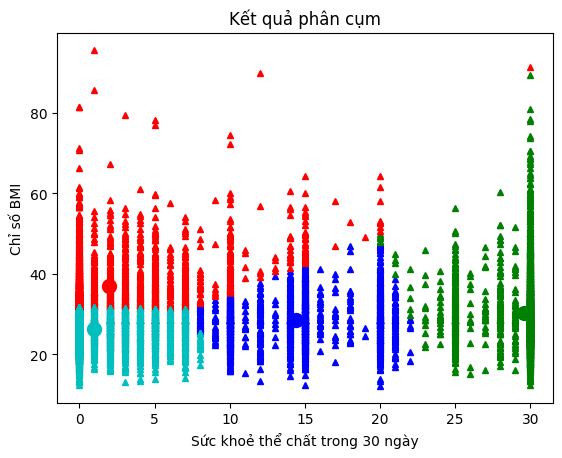

In [162]:
clus1 = 4  # Xác định số cụm (sửa thành 4)
kmeans1 = KMeans(n_clusters=clus1).fit(X1) # mô hình K-means được huấn luyện trên dữ liệu X1 đã được phân cụm
pred_label1 = kmeans1.predict(X1) # dự đoán nhãn của các điểm dữ liệu trong X2 dựa trên mô hình K-means đã huấn luyện

plt.xlabel('Sức khoẻ thể chất trong 30 ngày')
plt.ylabel('Chỉ số BMI')
plt.title('Kết quả phân cụm')

plt_colors = ['b', 'g', 'r', 'c'] # danh sách các màu hỗ trợ cho 4 cụm (sửa thành 4)

for i in range(4): # lặp qua 4 cụm (sửa thành 4)
    data1 = X1[pred_label1 == i]
    plt.plot(data1[:, 0], data1[:, 1], plt_colors[i] + '^', markersize=4)
    plt.plot(kmeans1.cluster_centers_[i][0], kmeans1.cluster_centers_[i][1], plt_colors[i] + 'o', markersize=10)
plt.show()

### **PHÂN CỤM THEO BMI và AgeCategory**

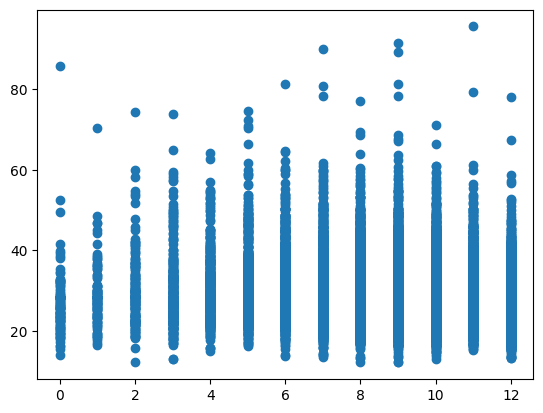

In [149]:
plt.scatter(df_1['AgeCategory'], df_1['BMI'])
plt.show()

In [150]:
df_cluster2 = df_1[['AgeCategory', 'BMI']]

C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

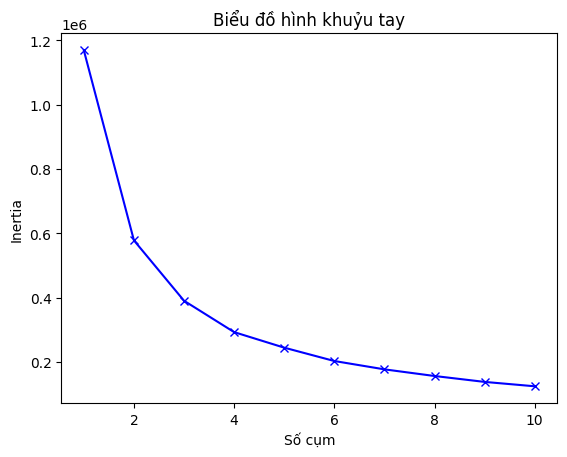

In [151]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster2)
    inertia.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Số cụm')
plt.ylabel('Inertia')
plt.title('Biểu đồ hình khuỷu tay')
plt.show()

In [152]:
X2 = df_cluster2.values[:, 0:df_cluster2.shape[1]]
X2.shape

(25108, 2)

C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


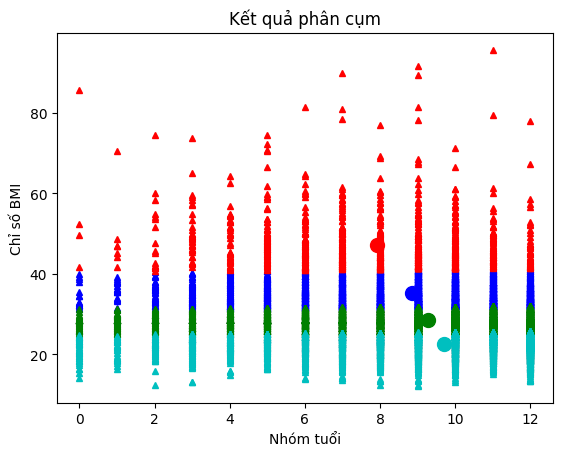

In [154]:
clus2 = 4  # Xác định số cụm (sửa thành 4)
kmeans2 = KMeans(n_clusters=clus2).fit(X2)  # mô hình K-means được huấn luyện trên dữ liệu X2 đã được phân cụm
pred_label2 = kmeans2.predict(X2)  # dự đoán nhãn của các điểm dữ liệu trong X2 dựa trên mô hình K-means đã huấn luyện

# Vẽ biểu đồ
plt.xlabel('Nhóm tuổi')
plt.ylabel('Chỉ số BMI')
plt.title('Kết quả phân cụm')

plt_colors = ['b', 'g', 'r', 'c']  # danh sách các màu hỗ trợ cho 4 cụm (sửa thành 4)

for i in range(4):  # Phân thành 4 cụm (sửa thành 4)
    data2 = X2[pred_label2 == i]
    plt.plot(data2[:, 0], data2[:, 1], plt_colors[i] + '^', markersize=4)
    plt.plot(kmeans2.cluster_centers_[i][0], kmeans2.cluster_centers_[i][1], plt_colors[i] + 'o', markersize=10)
plt.show()

### **Phân cụm theo 'PhysicalHealthDays' và 'MentalHealthDay'**

In [155]:
df_cluster3 = df_1[['MentalHealthDays', 'PhysicalHealthDays']]

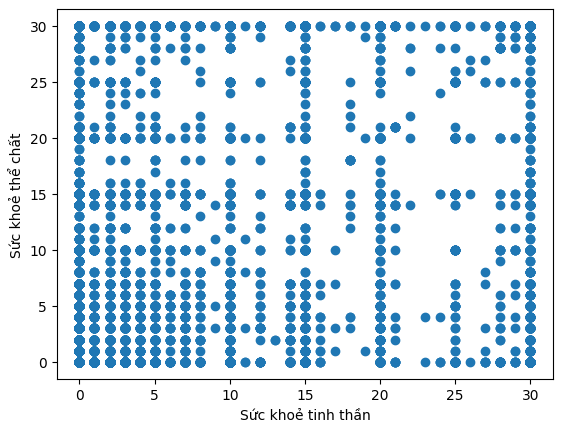

In [156]:
plt.scatter(df_cluster3['MentalHealthDays'], df_cluster3['PhysicalHealthDays'])
plt.xlabel('Sức khoẻ tinh thần')
plt.ylabel('Sức khoẻ thể chất')
plt.show()

In [157]:
X3 = df_cluster3.values[:, 0:df_cluster3.shape[1]]
X3.shape

(25108, 2)

C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: 

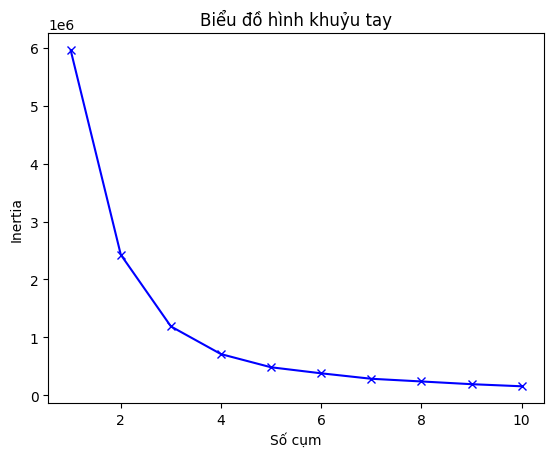

In [158]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster3)
    inertia.append(kmeans.inertia_)

# Vẽ đồ thị Elbow
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Số cụm')
plt.ylabel('Inertia')
plt.title('Biểu đồ hình khuỷu tay')
plt.show()

C:\Users\QuangHa\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


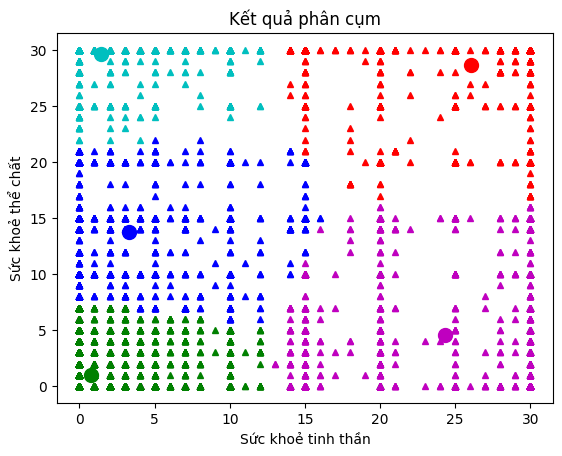

In [160]:
clus3 = 5  # Xác định số cụm (sửa thành 5)
kmeans3 = KMeans(n_clusters=clus3).fit(X3)  # mô hình K-means được huấn luyện trên dữ liệu X2 đã được phân cụm
pred_label3 = kmeans3.predict(X3)  # dự đoán nhãn của các điểm dữ liệu trong X2 dựa trên mô hình K-means đã huấn luyện

# Vẽ biểu đồ
plt.xlabel('Sức khoẻ tinh thần')
plt.ylabel('Sức khoẻ thể chất')
plt.title('Kết quả phân cụm')

plt_colors = ['b', 'g', 'r', 'c', 'm']  # danh sách các màu hỗ trợ cho 5 cụm (sửa thành 5)

for i in range(5):  # Phân thành 5 cụm (sửa thành 5)
    data3 = X3[pred_label3 == i]
    plt.plot(data3[:, 0], data3[:, 1], plt_colors[i] + '^', markersize=4)
    plt.plot(kmeans3.cluster_centers_[i][0], kmeans3.cluster_centers_[i][1], plt_colors[i] + 'o', markersize=10)
plt.show()